# Classification

`Classification` is the problem of identifying which of a set of categories (sub-populations) an observation (or observations) belongs to. For example, image classifiers can look at pixels from a scanned document to assign a number or letter to a handwritten character. Your email client likely incorporates a spam classifier to predict whether an email is spam or not.  

Statistical classifiers are used to predict all sorts of variables based upon past observations. The setup is always the same:

Given features $X_1, X_2, ... , X_n$

Predict a label $Y$

Logit references the logistic regression model. As you know, the term regression typically conjures thoughts of models with continuous output variables. We use regressors to help predict a quantity in the regressand. In classification we will use regressors to predict a category in the regressand. 

The logistic classification model is a binary or multinomial classification model in which the conditional probability of one or more realizations of an output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

Here we will practice classifying species of iris plants based upon the length and width of their sepals and petals. The iris data set is widely used as a beginner's dataset for machine learning purposes. The dataset is included in the machine learning package Scikit-learn. The dataset contains a set of 150 records compiled by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems

In [19]:
from sklearn import datasets 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import pandas as pd
import numpy as np

iris_df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True) # drops the empty line at file-end

iris_df.tail()



,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Iris Data Example

Remember the iris dataset contains measurements for 150 iris flowers from three different species?

The three classes in the Iris dataset are:

* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

And the four features of in Iris dataset are:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

In [20]:
iris_df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
#iris_df['class']=iris.target
#iris_df.isnull().sum() # look for null values
#iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] # name columns

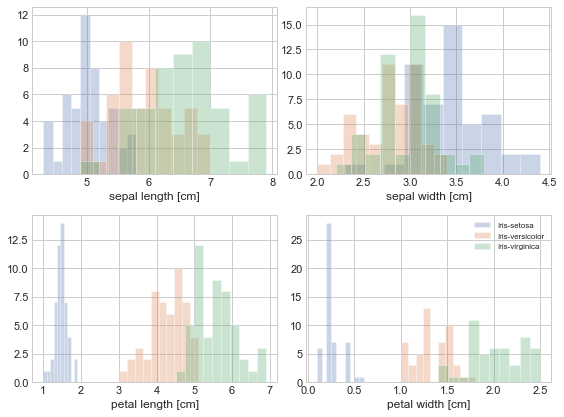

In [22]:
%matplotlib inline

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

X = iris_df.drop(['class'], axis=1)
X = X.values
y = iris_df['class']
y = y.values





label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

Multinomial logit can be used to predict the probability of category membership for a dependent variable based on multiple independent variables. The independent variables can be binary or continuous. Multinomial logistic regression is just like binary logistic regression in that it uses maximum likelihood estimation to evaluate the probability of categorical membership, but also different because it allows for more than two categories of the dependent or outcome variable.

You can start by setting up the left and right-hand side variables. The notation is very similar to the linear model we have worked with previously.

In [51]:
x = iris_df.drop(['petal_len', 'class'], axis=1)
x = sm.add_constant(x, prepend = False)
y = iris_df['class']

In [52]:
logit_model=sm.MNLogit(y,x)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.086339
         Iterations: 35
                         Results: MNLogit
Model:                MNLogit          Pseudo R-squared: 0.921     
Dependent Variable:   class            AIC:              41.9018   
Date:                 2023-11-07 17:05 BIC:              65.9869   
No. Observations:     150              Log-Likelihood:   -12.951   
Df Model:             6                LL-Null:          -164.79   
Df Residuals:         142              LLR p-value:      1.3298e-62
Converged:            0.0000           Scale:            1.0000    
No. Iterations:       35.0000                                      
-------------------------------------------------------------------
class = 0  Coef.    Std.Err.     t    P>|t|     [0.025     0.975]  
-------------------------------------------------------------------
sepal_len   8.0702  9022.7271  0.0009 0.9993 -17676.1499 17692.2903
sepal_wid -14.7537  4706.6414 -0.0031 0.9975  -9239.6012  9210.0939
petal_wi

c:\Users\carso\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
me = result.get_margeff()

print(me.summary())

       MNLogit Marginal Effects      
Dep. Variable:                  class
Method:                          dydx
At:                           overall
    class=Iris-setosa      dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sepal_len             -2.842e-08   4.93e-05     -0.001      1.000   -9.67e-05    9.67e-05
sepal_wid              5.196e-08   6.96e-05      0.001      0.999      -0.000       0.000
petal_wid             -1.467e-07      0.000     -0.001      0.999      -0.000       0.000
-----------------------------------------------------------------------------------------
class=Iris-versicolor      dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sepal_len                -0.0326      0.027     -1.200      0.230      -0.086       0.021
sepal_wid                 0.1213      

In [54]:
iris_df.groupby('class')['petal_len'].mean() #the marginal effects match the crosstabs

class
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_len, dtype: float64

Classification models typically first train on a subset of data and once 'fit' they are used to classify new data. Most machine learning problems are classification-based, fitting a model to predict what category a target variable belongs to. Multinomial logistic regression is just like regular binary logistic regression, just cooler because MLR can predict one out of n-possible outcomes.

MLR is a statistical classification algorithm that takes a set of features as inputs and uses a statistical model to predict the highest probability outcome from the feature set.

Here we will split our dataset into two parts: a training set and a testing set. The training set will be used to calibrate our predictive model. We will then apply the model to the test data to determine whether it is effective. 

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [56]:
x = iris_df.drop(['sepal_wid', 'petal_wid', 'sepal_len', 'class'], axis=1) #only use sepal length to predict species
y = iris_df['class']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.4) #40% if the observations will be used for testing, leaving 60% for training

In [57]:
reg = LogisticRegression(solver='newton-cg', multi_class='multinomial')
reg.fit(trainX, trainY)
y_pred = reg.predict(testX)

In [58]:
y_pred


array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-set

In [59]:
print('Accuracy: {:.2f}'.format(accuracy_score(testY, y_pred)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(testY, y_pred)))

Accuracy: 0.95
Error rate: 0.05


In [62]:
prob = reg.predict_proba(testX)

In [63]:
prob

array([[2.79826684e-03, 5.75939595e-01, 4.21262138e-01],
       [7.80435058e-04, 3.54006078e-01, 6.45213487e-01],
       [9.56971766e-01, 4.30263787e-02, 1.85521050e-06],
       [9.80006627e-01, 1.99930266e-02, 3.45955083e-07],
       [1.53958586e-02, 8.49013951e-01, 1.35590191e-01],
       [9.56971766e-01, 4.30263787e-02, 1.85521050e-06],
       [5.85142963e-03, 7.11146436e-01, 2.83002134e-01],
       [7.45962030e-07, 1.03879680e-02, 9.89611286e-01],
       [2.13416206e-05, 6.11883860e-02, 9.38790272e-01],
       [1.87109423e-03, 5.01162824e-01, 4.96966081e-01],
       [2.79826684e-03, 5.75939595e-01, 4.21262138e-01],
       [4.73109211e-02, 9.09684509e-01, 4.30045699e-02],
       [9.74137218e-01, 2.58621751e-02, 6.06706473e-07],
       [8.20994528e-03, 7.66729078e-01, 2.25060976e-01],
       [4.23969330e-07, 7.68322762e-03, 9.92316348e-01],
       [2.79826684e-03, 5.75939595e-01, 4.21262138e-01],
       [1.22225908e-03, 4.26031627e-01, 5.72746114e-01],
       [5.85142963e-03, 7.11146

The columns represent each class. The class with the highest relative probability is the predicted class. Notice that this array is smaller than the full dataset, these are just the test data:

In [64]:
print(prob.shape[0])

60


In [65]:
prob_array = pd.DataFrame(reg.predict_proba(testX), columns=reg.classes_)
prob_array #notice that each row sums to one - it has to be one of the species!

,Iris-setosa,Iris-versicolor,Iris-virginica
0,2.798267e-03,0.575940,4.212621e-01
1,7.804351e-04,0.354006,6.452135e-01
2,9.569718e-01,0.043026,1.855211e-06
3,9.800066e-01,0.019993,3.459551e-07
4,1.539586e-02,0.849014,1.355902e-01
5,9.569718e-01,0.043026,1.855211e-06
6,5.851430e-03,0.711146,2.830021e-01
7,7.459620e-07,0.010388,9.896113e-01
8,2.134162e-05,0.061188,9.387903e-01
9,1.871094e-03,0.501163,4.969661e-01


In [66]:
prob_array['prediction'] = y_pred #show the predicted species
prob_array['actual'] = testY.to_frame().reset_index().drop(columns='index')
prob_array

,Iris-setosa,Iris-versicolor,Iris-virginica,prediction,actual
0,2.798267e-03,0.575940,4.212621e-01,Iris-versicolor,Iris-versicolor
1,7.804351e-04,0.354006,6.452135e-01,Iris-virginica,Iris-virginica
2,9.569718e-01,0.043026,1.855211e-06,Iris-setosa,Iris-setosa
3,9.800066e-01,0.019993,3.459551e-07,Iris-setosa,Iris-setosa
4,1.539586e-02,0.849014,1.355902e-01,Iris-versicolor,Iris-versicolor
5,9.569718e-01,0.043026,1.855211e-06,Iris-setosa,Iris-setosa
6,5.851430e-03,0.711146,2.830021e-01,Iris-versicolor,Iris-versicolor
7,7.459620e-07,0.010388,9.896113e-01,Iris-virginica,Iris-virginica
8,2.134162e-05,0.061188,9.387903e-01,Iris-virginica,Iris-virginica
9,1.871094e-03,0.501163,4.969661e-01,Iris-versicolor,Iris-virginica


In [67]:
le = preprocessing.LabelEncoder()

prob_array['predicted'] = le.fit_transform(prob_array['prediction'])
prob_array['true'] = le.fit_transform(prob_array['actual'])



prob_array['verify'] = prob_array['true'] - prob_array['predicted']

In [68]:
prob_array

,Iris-setosa,Iris-versicolor,Iris-virginica,prediction,actual,predicted,true,verify
0,2.798267e-03,0.575940,4.212621e-01,Iris-versicolor,Iris-versicolor,1,1,0
1,7.804351e-04,0.354006,6.452135e-01,Iris-virginica,Iris-virginica,2,2,0
2,9.569718e-01,0.043026,1.855211e-06,Iris-setosa,Iris-setosa,0,0,0
3,9.800066e-01,0.019993,3.459551e-07,Iris-setosa,Iris-setosa,0,0,0
4,1.539586e-02,0.849014,1.355902e-01,Iris-versicolor,Iris-versicolor,1,1,0
5,9.569718e-01,0.043026,1.855211e-06,Iris-setosa,Iris-setosa,0,0,0
6,5.851430e-03,0.711146,2.830021e-01,Iris-versicolor,Iris-versicolor,1,1,0
7,7.459620e-07,0.010388,9.896113e-01,Iris-virginica,Iris-virginica,2,2,0
8,2.134162e-05,0.061188,9.387903e-01,Iris-virginica,Iris-virginica,2,2,0
9,1.871094e-03,0.501163,4.969661e-01,Iris-versicolor,Iris-virginica,1,2,1


In [69]:
prob_array['Correct?'] = np.where(prob_array['verify'] == 0, 'True', 'False')
prob_array = prob_array.drop(['predicted', 'true', 'verify'], axis=1)
prob_array

,Iris-setosa,Iris-versicolor,Iris-virginica,prediction,actual,Correct?
0,2.798267e-03,0.575940,4.212621e-01,Iris-versicolor,Iris-versicolor,True
1,7.804351e-04,0.354006,6.452135e-01,Iris-virginica,Iris-virginica,True
2,9.569718e-01,0.043026,1.855211e-06,Iris-setosa,Iris-setosa,True
3,9.800066e-01,0.019993,3.459551e-07,Iris-setosa,Iris-setosa,True
4,1.539586e-02,0.849014,1.355902e-01,Iris-versicolor,Iris-versicolor,True
5,9.569718e-01,0.043026,1.855211e-06,Iris-setosa,Iris-setosa,True
6,5.851430e-03,0.711146,2.830021e-01,Iris-versicolor,Iris-versicolor,True
7,7.459620e-07,0.010388,9.896113e-01,Iris-virginica,Iris-virginica,True
8,2.134162e-05,0.061188,9.387903e-01,Iris-virginica,Iris-virginica,True
9,1.871094e-03,0.501163,4.969661e-01,Iris-versicolor,Iris-virginica,False


In [70]:
prob_array['Correct?'].value_counts()

True     57
False     3
Name: Correct?, dtype: int64

In [71]:
#confirm accuracy of the model

right = prob_array[(prob_array["Correct?"] == 'True')].shape[0]
wrong = prob_array[(prob_array["Correct?"] == 'False')].shape[0]
total = prob_array["Correct?"].shape[0]

print('Accuracy level is:', (right / total * 100),'%')

Accuracy level is: 95.0 %


In [72]:
#and see where things went wrong

wrong = prob_array[(prob_array["Correct?"] == 'False')]
wrong

,Iris-setosa,Iris-versicolor,Iris-virginica,prediction,actual,Correct?
9,0.001871,0.501163,0.496966,Iris-versicolor,Iris-virginica,False
23,0.000488,0.287964,0.711548,Iris-virginica,Iris-versicolor,False
36,0.000780,0.354006,0.645213,Iris-virginica,Iris-versicolor,False


It looks like some of these predictions are WAY OFF. On plants \#6 and \#9, for instance, we could not have been further from the truth. Can you help improve the model? 

## Practice

Take 10 minutes to complete the following. Collaborate with those around you if you get stuck. 



1. Start by altering the model above to improve the fit. Add additional predictors and change the split of training/testing data. 

2. Once you have achieved a good fit with the iris data, load the wine data from the last problem set. The variable `class_label` identifies a type of wine. See if you can predict the type using the other included variables. DO NOT use them all - see how well your model can perform while omitting at least three of the included variables.  

3. Once you are satisfied with the model you have fit, compute the marginal effects of the coefficients and print them out using `summary2()`. Use crosstabs to confirm that the marginal effects are consistent with the data. 